In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
np.random.seed(22)

In [5]:
sample = df.sample(n=25, random_state=22)

In [6]:
mean_glucose_population = df['Glucose'].mean()
max_glucose_population = df['Glucose'].max()

In [7]:
mean_glucose_population

120.89453125

In [8]:
max_glucose_population

199

In [9]:
mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()

In [10]:
mean_glucose_sample

117.24

In [11]:
max_glucose_sample


186

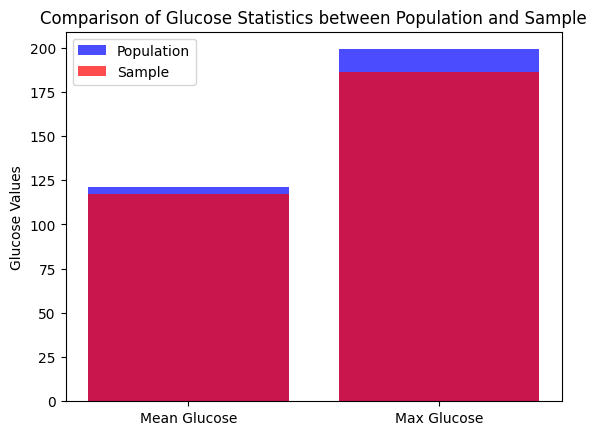

In [14]:
# Plotting the comparison
fig, ax = plt.subplots()
ax.bar(['Mean Glucose', 'Max Glucose'], [mean_glucose_population, max_glucose_population], label='Population', color='blue', alpha=0.7)
ax.bar(['Mean Glucose', 'Max Glucose'], [mean_glucose_sample, max_glucose_sample], label='Sample', color='red', alpha=0.7)

ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics between Population and Sample')
ax.legend()

plt.show()

In [15]:
# Finding the 98th percentile of BMI for both the sample and the population
percentile_98_population = np.percentile(df['BMI'], 98)
percentile_98_sample = np.percentile(sample['BMI'], 98)

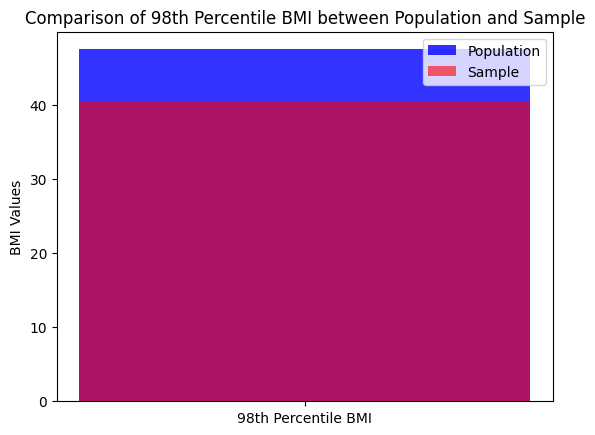

In [17]:
# Plotting the comparison
fig, ax = plt.subplots()
ax.bar(['98th Percentile BMI'], [percentile_98_population], label='Population', color='blue', alpha=0.8)
ax.bar(['98th Percentile BMI'], [percentile_98_sample], label='Sample', color='red', alpha=0.6)

ax.set_ylabel('BMI Values')
ax.set_title('Comparison of 98th Percentile BMI between Population and Sample')
ax.legend()

plt.show()

In [18]:
population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 95)

In [19]:
num_samples = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [20]:
for _ in range(num_samples):
    # Create a bootstrap sample (with replacement)
    bootstrap_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 95))

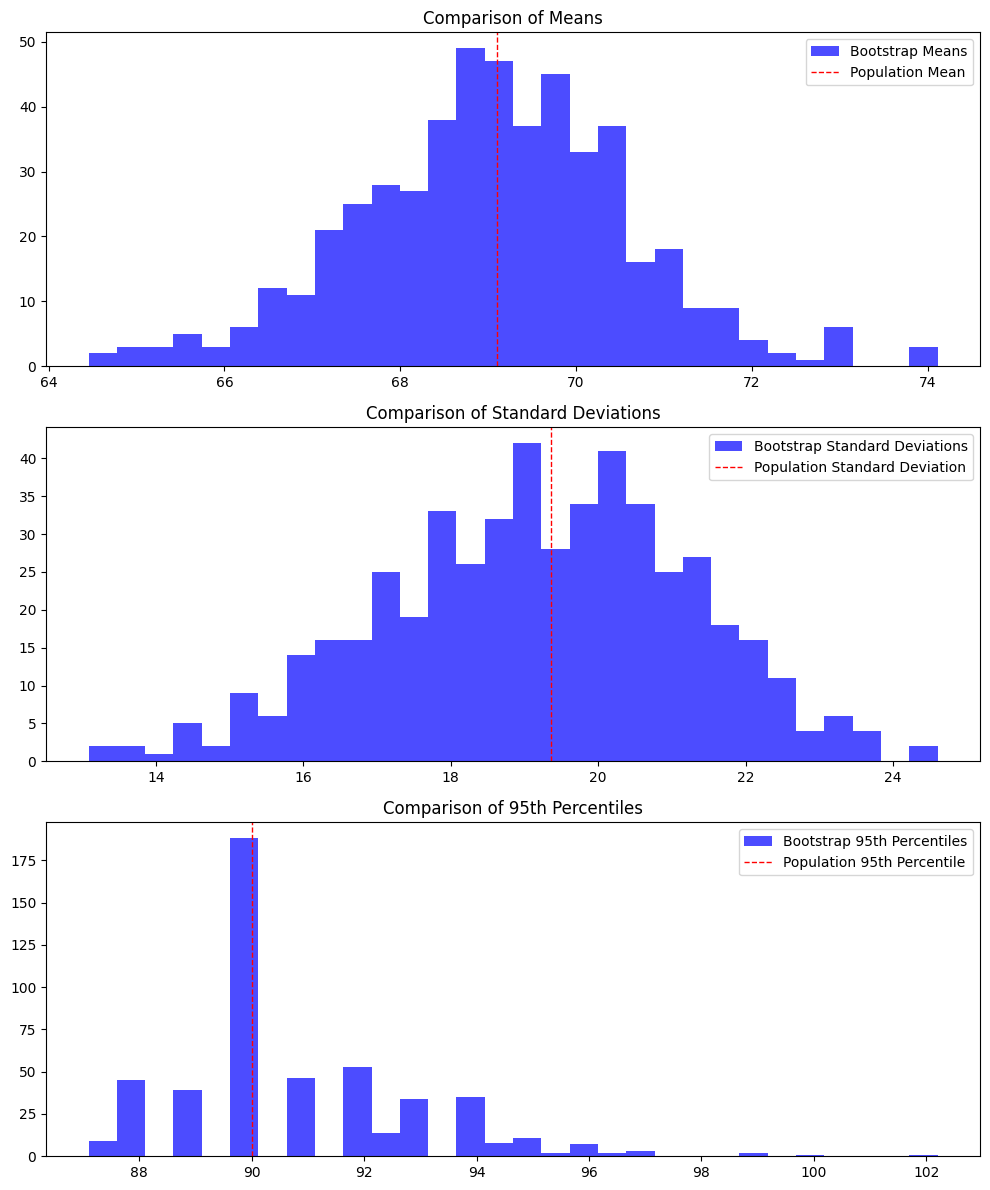

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Mean comparison
axes[0].hist(bootstrap_means, bins=30, color='blue', alpha=0.7, label='Bootstrap Means')
axes[0].axvline(population_mean, color='red', linestyle='dashed', linewidth=1, label='Population Mean')
axes[0].set_title('Comparison of Means')
axes[0].legend()


# Standard Deviation comparison
axes[1].hist(bootstrap_stds, bins=30, color= 'blue', alpha=0.7, label='Bootstrap Standard Deviations')
axes[1].axvline(population_std, color='red', linestyle='dashed', linewidth=1, label='Population Standard Deviation')
axes[1].set_title('Comparison of Standard Deviations')
axes[1].legend()

# Percentile comparison
axes[2].hist(bootstrap_percentiles, bins=30, color='blue', alpha=0.7, label='Bootstrap 95th Percentiles')
axes[2].axvline(population_percentile, color='red', linestyle='dashed', linewidth=1, label='Population 95th Percentile')
axes[2].set_title('Comparison of 95th Percentiles')
axes[2].legend()

plt.tight_layout()
plt.show()